Here is the NCL code example:
```
;*************************************************
; NCL Graphics: polar_1.ncl
;
; Concepts illustrated:
;   - Drawing black-and-white contours over a polar stereographic map
;   - Drawing the northern hemisphere of a polar stereographic map
;
;************************************************
;
; These files are loaded by default in NCL V6.2.0 and newer
; load "$NCARG_ROOT/lib/ncarg/nclscripts/csm/gsn_code.ncl"
; load "$NCARG_ROOT/lib/ncarg/nclscripts/csm/gsn_csm.ncl" 
;************************************************
begin
;************************************************
; read in netCDF file
;************************************************
  a = addfile("$NCARG_ROOT/lib/ncarg/data/cdf/uv300.nc","r")
;************************************************
; read in zonal winds
;************************************************
  u = a->U(1,:,:)                                ; read July zonal winds
;************************************************
; create plot
;************************************************
  wks = gsn_open_wks("png","polar")              ; send graphics to PNG file
  res            = True                          ; plot mods desired
  res@gsnPolar   = "NH"                          ; specify the hemisphere
  plot = gsn_csm_contour_map_polar(wks,u,res)    ; create the plot

end
```

In [11]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [3]:
a = xr.open_dataset("/Users/brianpm/Documents/www.ncl.ucar.edu/Applications/Data/cdf/uv300.nc")
u = a["U"].isel(time=1)

In [4]:
u

<xarray.DataArray 'U' (lat: 64, lon: 128)>
array([[-1.815093, -1.62264 , -1.421098, ..., -2.332198, -2.169976, -1.997828],
       [-2.382879, -2.265598, -2.136023, ..., -2.666621, -2.582822, -2.488428],
       [-1.042153, -1.033205, -1.017532, ..., -1.027491, -1.042453, -1.045646],
       ...,
       [ 3.277355,  3.488276,  3.716536, ...,  2.773481,  2.918328,  3.086688],
       [ 2.367301,  2.494937,  2.630062, ...,  2.0452  ,  2.141184,  2.248911],
       [ 1.418476,  1.444668,  1.471588, ...,  1.350908,  1.370967,  1.393692]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 -180.0 -177.1875 -174.375 ... 174.375 177.1875
    time     int32 7
Attributes:
    long_name:   Zonal Wind
    short_name:  U
    units:       m/s

Text(0, 0, 'HERE')

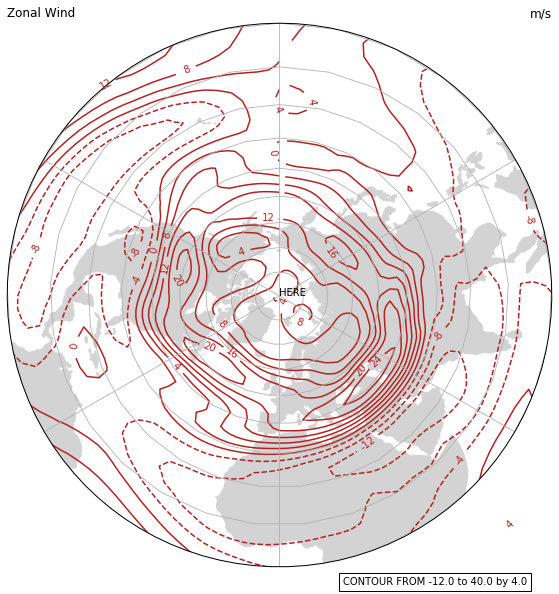

In [40]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={"projection":ccrs.NorthPolarStereo()})

# following https://scitools.org.uk/cartopy/docs/latest/gallery/always_circular_stereo.html#custom-boundary-shape
import matplotlib.path as mpath
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

ax.set_extent([-180, 180, 0, 90], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='lightgray')
# ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines()

# regular plotting
lons, lats = np.meshgrid(a['lon'], a['lat'])
lvls = np.arange(-12, 40+4, 4)
CS = ax.contour(lons, lats, u, transform=ccrs.PlateCarree(), colors='firebrick', levels=lvls)
ax.clabel(CS, CS.levels, inline=True, fontsize=10, fmt='%2.0f')

fig.text( 0.6, 0.1, f"CONTOUR FROM {min(CS.levels)} to {max(CS.levels)} by {CS.levels[1]-CS.levels[0]}", bbox=dict(facecolor='none', edgecolor='black'))

ax.set_title(u.long_name, loc='left')
ax.set_title(u.units, loc='right')

ax.text(0, 0, "HERE")

In [20]:
np.arange(-12, 40+4, 4)

array([-12,  -8,  -4,   0,   4,   8,  12,  16,  20,  24,  28,  32,  36,
        40])